In [50]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import math
from datetime import datetime
import matplotlib.pyplot as plt

In [51]:
data = pd.read_excel("Données TD3.xlsx")
data['Date'] = pd.to_datetime(data['Date'])
data

date = data['Date']

Z = exp(−rT)(ST − K)+

In [52]:
def black_scholes_call(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    call_price = S * N_d1 - K * np.exp(-r * T) * N_d2
    return call_price

def calculate_delta(S, K, r, T, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        delta = norm.cdf(d1)
    else:
        delta = -norm.cdf(-d1)
    return delta

def calculate_gamma(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma
def calculate_vega(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S0 * np.sqrt(T) * norm.pdf(d1)

1/ A partir des données fournies (historique d’une action, colonne B), créez l’historique du portefeuille 
de réplication d’un call européen de maturité le 31/12/2018, de strike 6 et de volatilité constante égale 
à 20%. Ce portefeuille de réplication a-t-il toujours la valeur de l’option ? Pourquoi ?

In [53]:
call_price_BS = []
delta_call = []
gamma_call = []


for i in range(len(data['Date'])):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    call_price_BS.append(black_scholes_call(data['Prix action'][i],6,0,maturity,0.2))
    delta_call.append(calculate_delta(data['Prix action'][i],6,0,maturity,0.2))
    gamma_call.append(calculate_gamma(data['Prix action'][i],6,0,maturity,0.2))
    
data['delta_call'] = delta_call
data['call_price_BS'] = call_price_BS
data['gamma_call'] = gamma_call

data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call
0,2017-10-02,6.742,NaN,NaN,0.736896,1.012460,0.216772
1,2017-10-03,6.955,NaN,NaN,0.780447,1.173632,0.190640
2,2017-10-04,6.910,1.02096,0.59093,0.771918,1.138193,0.196300
3,2017-10-05,7.006,1.09932,0.65885,0.790382,1.212687,0.184633
4,2017-10-06,7.000,1.09306,0.65440,0.789458,1.207450,0.185474
...,...,...,...,...,...,...,...
252,2018-09-27,6.028,0.37835,0.26191,0.538497,0.258953,0.645599
253,2018-09-28,5.844,0.28498,0.19737,0.417298,0.169706,0.658089
254,2018-10-01,5.724,0.24261,0.16974,0.336647,0.120900,0.638562
255,2018-10-02,5.690,0.24491,0.17452,0.314013,0.108709,0.627796


V0 + delta*(V1-V0)

In [54]:
portflio_values = []

portflio_values.append(call_price_BS[0])
for i in range(1,len(data)):
    portflio_values.append(portflio_values[i-1] + data['delta_call'][i-1]*((data['Prix action'][i])-data['Prix action'][i-1]))

data['portfolio_values'] = portflio_values
data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call,portfolio_values
0,2017-10-02,6.742,NaN,NaN,0.736896,1.012460,0.216772,1.012460
1,2017-10-03,6.955,NaN,NaN,0.780447,1.173632,0.190640,1.169419
2,2017-10-04,6.910,1.02096,0.59093,0.771918,1.138193,0.196300,1.134298
3,2017-10-05,7.006,1.09932,0.65885,0.790382,1.212687,0.184633,1.208403
4,2017-10-06,7.000,1.09306,0.65440,0.789458,1.207450,0.185474,1.203660
...,...,...,...,...,...,...,...,...
252,2018-09-27,6.028,0.37835,0.26191,0.538497,0.258953,0.645599,0.222669
253,2018-09-28,5.844,0.28498,0.19737,0.417298,0.169706,0.658089,0.123586
254,2018-10-01,5.724,0.24261,0.16974,0.336647,0.120900,0.638562,0.073510
255,2018-10-02,5.690,0.24491,0.17452,0.314013,0.108709,0.627796,0.062064


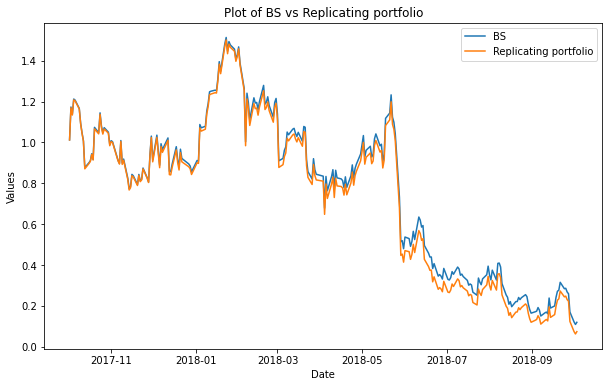

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].values, data['call_price_BS'].values, label='BS')
plt.plot(data['Date'].values, data['portfolio_values'].values, label='Replicating portfolio')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Plot of BS vs Replicating portfolio')
plt.legend()

# Show the plot
plt.show()

0.03121537822667763


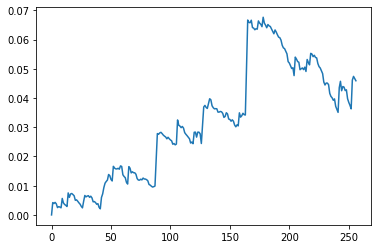

In [56]:
spread_bs_port = data['call_price_BS'].values -data['portfolio_values'].values
plt.plot(spread_bs_port)
print(spread_bs_port.mean())

2/ On suppose qu’on dispose en plus d’une autre option de mêmes caractéristiques (en particulier une 
volatilité de 20%), sinon le strike qui vaut 6.5. On se propose de répliquer notre option initiale en delta 
et en gamma. Comment procéder ? Ce nouveau portefeuille de réplication a-t-il toujours la valeur de 
l’option ?

In [57]:
call_price_BS_2 = []
delta_call_2 = []
gamma_call_2 = []


for i in range(len(data['Date'])):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    call_price_BS_2.append(black_scholes_call(data['Prix action'][i],6.5,0,maturity,0.2))
    delta_call_2.append(calculate_delta(data['Prix action'][i],6.5,0,maturity,0.2))
    gamma_call_2.append(calculate_gamma(data['Prix action'][i],6.5,0,maturity,0.2))
    

data['call_price_BS_2'] = call_price_BS_2
data['delta_call_2'] = delta_call_2
data['gamma_call_2'] = gamma_call_2

data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call,portfolio_values,call_price_BS_2,delta_call_2,gamma_call_2
0,2017-10-02,6.742,NaN,NaN,0.736896,1.012460,0.216772,1.012460,0.717437,0.608477,0.255134
1,2017-10-03,6.955,NaN,NaN,0.780447,1.173632,0.190640,1.169419,0.852063,0.660876,0.235955
2,2017-10-04,6.910,1.02096,0.59093,0.771918,1.138193,0.196300,1.134298,0.821935,0.650227,0.240523
3,2017-10-05,7.006,1.09932,0.65885,0.790382,1.212687,0.184633,1.208403,0.884829,0.672962,0.231411
4,2017-10-06,7.000,1.09306,0.65440,0.789458,1.207450,0.185474,1.203660,0.880172,0.671660,0.232239
...,...,...,...,...,...,...,...,...,...,...,...
252,2018-09-27,6.028,0.37835,0.26191,0.538497,0.258953,0.645599,0.222669,0.085338,0.245782,0.511987
253,2018-09-28,5.844,0.28498,0.19737,0.417298,0.169706,0.658089,0.123586,0.047469,0.159275,0.408992
254,2018-10-01,5.724,0.24261,0.16974,0.336647,0.120900,0.638562,0.073510,0.029332,0.110635,0.330316
255,2018-10-02,5.690,0.24491,0.17452,0.314013,0.108709,0.627796,0.062064,0.025212,0.098443,0.307024


In [58]:
nc = []
for i in range(len(data)):
    nc.append(data['gamma_call'][i]/data['gamma_call_2'][i])
data['nc'] = nc

In [59]:
ns = []
for i in range(len(data)):
    ns.append(data['delta_call'][i] - data['delta_call_2'][i]*data['nc'][i])
data['ns'] = ns

In [60]:
data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call,portfolio_values,call_price_BS_2,delta_call_2,gamma_call_2,nc,ns
0,2017-10-02,6.742,NaN,NaN,0.736896,1.012460,0.216772,1.012460,0.717437,0.608477,0.255134,0.849638,0.219911
1,2017-10-03,6.955,NaN,NaN,0.780447,1.173632,0.190640,1.169419,0.852063,0.660876,0.235955,0.807950,0.246492
2,2017-10-04,6.910,1.02096,0.59093,0.771918,1.138193,0.196300,1.134298,0.821935,0.650227,0.240523,0.816138,0.241243
3,2017-10-05,7.006,1.09932,0.65885,0.790382,1.212687,0.184633,1.208403,0.884829,0.672962,0.231411,0.797855,0.253456
4,2017-10-06,7.000,1.09306,0.65440,0.789458,1.207450,0.185474,1.203660,0.880172,0.671660,0.232239,0.798634,0.253047
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2018-09-27,6.028,0.37835,0.26191,0.538497,0.258953,0.645599,0.222669,0.085338,0.245782,0.511987,1.260968,0.228573
253,2018-09-28,5.844,0.28498,0.19737,0.417298,0.169706,0.658089,0.123586,0.047469,0.159275,0.408992,1.609050,0.161017
254,2018-10-01,5.724,0.24261,0.16974,0.336647,0.120900,0.638562,0.073510,0.029332,0.110635,0.330316,1.933187,0.122769
255,2018-10-02,5.690,0.24491,0.17452,0.314013,0.108709,0.627796,0.062064,0.025212,0.098443,0.307024,2.044774,0.112719


In [61]:
portflio_values_2 = []
portflio_values_2.append(call_price_BS[0])

for i in range(1,len(data)):
    portflio_values_2.append(portflio_values_2[i-1] + data['ns'][i-1]*(data['Prix action'][i] - data['Prix action'][i-1]) + data['nc'][i-1]*(data['call_price_BS_2'][i]-data['call_price_BS_2'][i-1]))

data['portfolio_values_2'] = portflio_values_2

In [62]:
data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call,portfolio_values,call_price_BS_2,delta_call_2,gamma_call_2,nc,ns,portfolio_values_2
0,2017-10-02,6.742,NaN,NaN,0.736896,1.012460,0.216772,1.012460,0.717437,0.608477,0.255134,0.849638,0.219911,1.012460
1,2017-10-03,6.955,NaN,NaN,0.780447,1.173632,0.190640,1.169419,0.852063,0.660876,0.235955,0.807950,0.246492,1.173684
2,2017-10-04,6.910,1.02096,0.59093,0.771918,1.138193,0.196300,1.134298,0.821935,0.650227,0.240523,0.816138,0.241243,1.138250
3,2017-10-05,7.006,1.09932,0.65885,0.790382,1.212687,0.184633,1.208403,0.884829,0.672962,0.231411,0.797855,0.253456,1.212740
4,2017-10-06,7.000,1.09306,0.65440,0.789458,1.207450,0.185474,1.203660,0.880172,0.671660,0.232239,0.798634,0.253047,1.207503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2018-09-27,6.028,0.37835,0.26191,0.538497,0.258953,0.645599,0.222669,0.085338,0.245782,0.511987,1.260968,0.228573,0.258080
253,2018-09-28,5.844,0.28498,0.19737,0.417298,0.169706,0.658089,0.123586,0.047469,0.159275,0.408992,1.609050,0.161017,0.168270
254,2018-10-01,5.724,0.24261,0.16974,0.336647,0.120900,0.638562,0.073510,0.029332,0.110635,0.330316,1.933187,0.122769,0.119766
255,2018-10-02,5.690,0.24491,0.17452,0.314013,0.108709,0.627796,0.062064,0.025212,0.098443,0.307024,2.044774,0.112719,0.107626


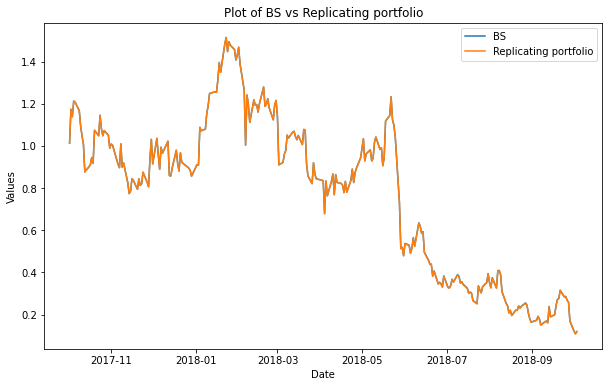

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].values, data['call_price_BS'].values, label='BS')
plt.plot(data['Date'].values, data['portfolio_values_2'].values, label='Replicating portfolio')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Plot of BS vs Replicating portfolio')
plt.legend()

# Show the plot
plt.show()

0.00048718766994259644


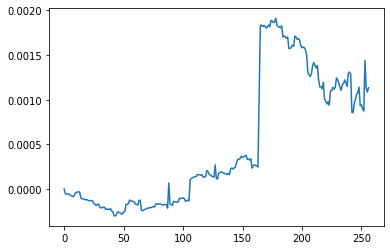

In [64]:
spread_bs_port_2 = data['call_price_BS'].values -data['portfolio_values_2'].values
plt.plot(spread_bs_port_2)
print(spread_bs_port_2.mean())

3/ Représenter le prix d’un call européen en fonction du paramètre de volatilité et calibrer la volatilité 
implicite en utilisant l’algorithme de Newton-Raphson puis l’algorithme de dichotomie.

In [65]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import newton

def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def implied_volatility_newton(call_price, S, K, T, r, initial_volatility=0.2, max_iter=100, tol=1e-6):
    def f(sigma):
        return black_scholes_call_price(S, K, T, r, sigma) - call_price

    def f_prime(sigma):
        d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
        return S * np.sqrt(T) * norm.pdf(d1)

    implied_volatility = newton(f, initial_volatility, f_prime, tol=tol, maxiter=max_iter)
    return implied_volatility

def implied_volatility_dichotomy(call_price, S, K, T, r, lower_bound=0.01, upper_bound=1.0, tol=1e-6):
    def f(sigma):
        return black_scholes_call_price(S, K, T, r, sigma) - call_price

    while (upper_bound - lower_bound) / 2 > tol:
        midpoint = (lower_bound + upper_bound) / 2
        if f(lower_bound) * f(midpoint) < 0:
            upper_bound = midpoint
        else:
            lower_bound = midpoint

    implied_volatility = (lower_bound + upper_bound) / 2
    return implied_volatility


In [66]:
# Paramètres
S = 100  # Prix de l'action
K = 100  # Prix d'exercice du call
T = 1    # Temps jusqu'à l'expiration du call (en années)
r = 0.05  # Taux d'intérêt sans risque
call_price_target = 10  # Prix du call que vous souhaitez calibrer

# Calcul de la volatilité implicite avec l'algorithme de Newton-Raphson
volatility_newton = implied_volatility_newton(call_price_target, S, K, T, r)
print(f"Volatilité implicite (Newton-Raphson): {volatility_newton:.4f}")

# Calcul de la volatilité implicite avec l'algorithme de dichotomie
volatility_dichotomy = implied_volatility_dichotomy(call_price_target, S, K, T, r)
print(f"Volatilité implicite (Dichotomie): {volatility_dichotomy:.4f}")

Volatilité implicite (Newton-Raphson): 0.1880
Volatilité implicite (Dichotomie): 0.1880


In [67]:
implied_volatility_newton(data['Prix option strike 6'][4],data['Prix action'][4],6,maturity,0)

0.3248563509030945

In [68]:
implied_volatility_dichotomy(data['Prix option strike 6'][4],data['Prix action'][4],6,maturity,0)

0.32485571861267093

4/ Estimer l’historique de volatilité implicite pour les deux options dont on a l’historique de prix 
(colonnes C et D). 

In [69]:
implied_vol_newton = []
for i in range(len(data)):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    try:
        implied_vol_newton.append(implied_volatility_newton(data['Prix option strike 6'][i],data['Prix action'][i],6,maturity,0))
    except:
        implied_vol_newton.append(0)
implied_vol_newton

[0,
 0,
 0.14585982280405935,
 0.14478865705198674,
 0.14431055401663084,
 0.143376249333583,
 0.14296031428120942,
 0.1435088642843417,
 0.14462888400112606,
 0.1465808673587436,
 0.15697992999022548,
 0.16120200979116972,
 0.16320751799998234,
 0.16255799654486044,
 0.16380742903448764,
 0.15918118759920757,
 0.15521756575005116,
 0.15180205363017132,
 0.14971086884163662,
 0.148617769983636,
 0.14727695830039877,
 0.14670529621132355,
 0.14858507527148543,
 0.14878611867465735,
 0.14894062548269768,
 0.15009759540139797,
 0.15504846798966163,
 0.15910062461437377,
 0.15686903007752007,
 0.16096921463615324,
 0.1616618713507513,
 0.17017462823351254,
 0.18083579486343887,
 0.18671694118206753,
 0.18561233816135514,
 0.18485277054525984,
 0.18859372977900796,
 0.18658019627727646,
 0.18775755882264733,
 0.18758270374023356,
 0.18318118085662763,
 0.18384779182926136,
 0.1860099382787087,
 0.17846286122550573,
 0.1692495516733546,
 0.16779717713443168,
 0.16191016530259716,
 0.15984415

In [70]:
implied_vol_newton_5 = []
for i in range(len(data)):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    try:
        implied_vol_newton_5.append(implied_volatility_newton(data['Prix option strike 6,5'][i],data['Prix action'][i],6.5,maturity,0))
    except:
        implied_vol_newton_5.append(0)
implied_vol_newton_5

[0,
 0,
 0.11696741446486845,
 0.11656523091931666,
 0.11668746771615673,
 0.11628250373499675,
 0.11575161257975333,
 0.11784389113587214,
 0.12355695337194601,
 0.13248700049914802,
 0.15872073291633765,
 0.17265959433646527,
 0.18075221383114135,
 0.1814521469133252,
 0.18595568942454951,
 0.16867577567068792,
 0.15815108755074114,
 0.14546996513967766,
 0.13898899102849668,
 0.13724678245686917,
 0.1335633878592775,
 0.1328929380870095,
 0.14041918983425378,
 0.14264335419129787,
 0.14471853921787853,
 0.14943402578955556,
 0.162935582067227,
 0.17428475951545175,
 0.16633212787522667,
 0.17671037413130655,
 0.1804652596491309,
 0.19680530139019098,
 0.21499681366855625,
 0.2259208575917405,
 0.22560909485398697,
 0.22591215540902249,
 0.23209230199043904,
 0.22946727592804117,
 0.23177546946437583,
 0.23209389349387527,
 0.2247326992615324,
 0.22604278371264622,
 0.22969614787181986,
 0.2136532764756616,
 0.18963385127688318,
 0.18889103878186206,
 0.1717840156204741,
 0.169337218

In [71]:
implied_vol_dichotomy = []
for i in range(len(data)):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    try:
        implied_vol_dichotomy.append(implied_volatility_dichotomy(data['Prix option strike 6'][i],data['Prix action'][i],6,maturity,0))
    except:
        implied_vol_dichotomy.append(0)
implied_vol_dichotomy

[0.9999990558624268,
 0.9999990558624268,
 0.1458604526519775,
 0.14478791236877447,
 0.14431017875671392,
 0.14337548255920413,
 0.14296006202697753,
 0.14350955009460448,
 0.14462929725646972,
 0.14658177375793457,
 0.15698050498962401,
 0.1612026882171631,
 0.16320803642272946,
 0.1625584697723389,
 0.16380661964416499,
 0.15918034553527832,
 0.15521685600280766,
 0.15180285453796388,
 0.14971064567565917,
 0.14861733436584473,
 0.14727665901184084,
 0.14670451164245607,
 0.14858523368835447,
 0.14878539085388182,
 0.14894022941589358,
 0.1500977420806885,
 0.15504879951477052,
 0.15910103797912595,
 0.15686909675598143,
 0.16096854209899902,
 0.16166153907775882,
 0.17017388343811035,
 0.1808350849151611,
 0.18671706199645993,
 0.18561242103576664,
 0.1848533344268799,
 0.1885940074920654,
 0.18658110618591306,
 0.1877575016021728,
 0.1875818920135498,
 0.18318032264709472,
 0.1838468837738037,
 0.1860108470916748,
 0.17846341133117677,
 0.169248628616333,
 0.16779654502868657,
 0.

In [72]:
implied_vol_dichotomy_5 = []
for i in range(len(data)):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    try:
        implied_vol_dichotomy_5.append(implied_volatility_dichotomy(data['Prix option strike 6,5'][i],data['Prix action'][i],6.5,maturity,0))
    except:
        implied_vol_dichotomy_5.append(0)
implied_vol_dichotomy_5

[0.9999990558624268,
 0.9999990558624268,
 0.1169679546356201,
 0.11656575202941893,
 0.11668660163879394,
 0.11628251075744629,
 0.11575190544128419,
 0.11784411430358886,
 0.12355614662170414,
 0.13248768806457523,
 0.1587214946746826,
 0.17265885353088378,
 0.18075200080871578,
 0.1814525508880615,
 0.18595608711242673,
 0.16867648124694823,
 0.1581512355804443,
 0.1454695796966553,
 0.13898901939392094,
 0.13724614143371583,
 0.1335640048980713,
 0.13289366722106938,
 0.14041844367980955,
 0.1426428318023682,
 0.1447180461883545,
 0.1494349575042725,
 0.16293612480163572,
 0.1742846584320068,
 0.16633124351501466,
 0.17671109199523927,
 0.18046498298645014,
 0.19680611610412596,
 0.21499587059020997,
 0.22592143058776853,
 0.2256098651885986,
 0.2259119892120361,
 0.23209231376647949,
 0.22946761131286625,
 0.2317750835418701,
 0.23209420204162595,
 0.22473181724548336,
 0.22604228019714356,
 0.22969609260559087,
 0.21365330696105955,
 0.18963444709777832,
 0.18889046669006343,
 0.

In [73]:
data['Vol I6 Newton'] = implied_vol_newton
data['Vol I6 Dichotomy'] = implied_vol_dichotomy
data['Vol I6,5 Newton'] = implied_vol_newton_5
data['Vol I6,5 Dichotomy'] = implied_vol_dichotomy_5

In [74]:
data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call,portfolio_values,call_price_BS_2,delta_call_2,gamma_call_2,nc,ns,portfolio_values_2,Vol I6 Newton,Vol I6 Dichotomy,"Vol I6,5 Newton","Vol I6,5 Dichotomy"
0,2017-10-02,6.742,NaN,NaN,0.736896,1.012460,0.216772,1.012460,0.717437,0.608477,0.255134,0.849638,0.219911,1.012460,0.000000,0.999999,0.000000,0.999999
1,2017-10-03,6.955,NaN,NaN,0.780447,1.173632,0.190640,1.169419,0.852063,0.660876,0.235955,0.807950,0.246492,1.173684,0.000000,0.999999,0.000000,0.999999
2,2017-10-04,6.910,1.02096,0.59093,0.771918,1.138193,0.196300,1.134298,0.821935,0.650227,0.240523,0.816138,0.241243,1.138250,0.145860,0.145860,0.116967,0.116968
3,2017-10-05,7.006,1.09932,0.65885,0.790382,1.212687,0.184633,1.208403,0.884829,0.672962,0.231411,0.797855,0.253456,1.212740,0.144789,0.144788,0.116565,0.116566
4,2017-10-06,7.000,1.09306,0.65440,0.789458,1.207450,0.185474,1.203660,0.880172,0.671660,0.232239,0.798634,0.253047,1.207503,0.144311,0.144310,0.116687,0.116687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2018-09-27,6.028,0.37835,0.26191,0.538497,0.258953,0.645599,0.222669,0.085338,0.245782,0.511987,1.260968,0.228573,0.258080,0.297813,0.297814,0.361408,0.361407
253,2018-09-28,5.844,0.28498,0.19737,0.417298,0.169706,0.658089,0.123586,0.047469,0.159275,0.408992,1.609050,0.161017,0.168270,0.298548,0.298548,0.362253,0.362253
254,2018-10-01,5.724,0.24261,0.16974,0.336647,0.120900,0.638562,0.073510,0.029332,0.110635,0.330316,1.933187,0.122769,0.119766,0.312172,0.312172,0.376124,0.376124
255,2018-10-02,5.690,0.24491,0.17452,0.314013,0.108709,0.627796,0.062064,0.025212,0.098443,0.307024,2.044774,0.112719,0.107626,0.328587,0.328587,0.393196,0.393196


<AxesSubplot:>

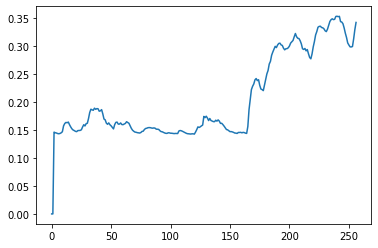

In [83]:
data['Vol I6 Newton'].plot()

<AxesSubplot:>

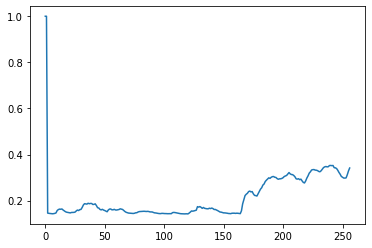

In [84]:
data['Vol I6 Dichotomy'].plot()

5/ Déterminer rétrospectivement la meilleure couverture dynamique pour la première option (strike 
de 6, colonne C), puis proposer un portefeuille de réplication pour la dernière date (pour vous couvrir 
jusqu’au lendemain). Vous déposerez votre réponse ici : https://goo.gl/forms/9bobGfSpaU9aRDWF3 
(cela contribuera à une partie de la note finale de ce cours, l’absence de réponse fera donc baisser 
cette note). Lors de la prochaine séance, le P&L obtenu par votre stratégie de réplication vous sera 
dévoilé. 

In [91]:
def replication_portfolio(S, K, T, r, implied_volatility, option_type='call'):
    d1 = (np.log(S / K) + (r + (implied_volatility ** 2) / 2) * T) / (implied_volatility * np.sqrt(T))
    if option_type == 'call':
        delta = norm.cdf(d1)
    else:
        pass

    amount_in_risk_free = delta * S

    amount_in_stock = delta * S - black_scholes_call(S, K, T, r, implied_volatility)

    return delta, amount_in_risk_free, amount_in_stock



In [92]:
delta_tab = []
amount_in_risk_free = []
amount_in_stock = []


for i in range(len(data)):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    try:
        a, b, c = replication_portfolio(data['Prix action'][i], 6, maturity, 0, data['Vol I6 Newton'][i])
        delta_tab.append(a)
        amount_in_risk_free.append(b)
        amount_in_stock.append(c)
    except:
        delta_tab.append(0)
        amount_in_risk_free.append(0)
        amount_in_stock.append(0)



C:\Users\theom\AppData\Local\Temp\ipykernel_22856\4163683493.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + (implied_volatility ** 2) / 2) * T) / (implied_volatility * np.sqrt(T))
C:\Users\theom\AppData\Local\Temp\ipykernel_22856\2593681655.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\theom\AppData\Local\Temp\ipykernel_22856\2593681655.py:2: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


In [97]:
amount_in_stock[-1]

2.4250249262023313

<function matplotlib.pyplot.show(close=None, block=None)>

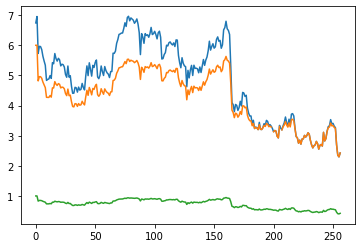

In [93]:
plt.plot(amount_in_risk_free)
plt.plot(amount_in_stock)
plt.plot(delta_tab)

plt.show